
Integrantes:

David Bugoi

Fernando Javier Gómez Márquez

Daniel Hernández Martínez

Carga de datos

Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import os.path

In [2]:
RANDOM_STATE = 813

In [3]:
def genera_df(ficherocsv, nro_filas=None):
    try:
      from google.colab import drive
      drive.mount('/content/drive')
      df = pd.read_csv(os.path.join('drive/MyDrive/Colab Notebooks/',ficherocsv), nrows=nro_filas)
    except:   # si no es en google colab, se supone que estamos ejecutando el notebook en nuestro servidor local y que el fichero está en el mismo directorio
      df = pd.read_csv(ficherocsv, nrows=nro_filas)
    return df

In [4]:
fdatos = 'heart.csv'

df = genera_df(fdatos)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Comprobamos si existen valores nulos en el dataframe

In [5]:
df.isnull().values.any()

False

Como no hay ningún null ni NaN no hay que hacer tratamiento al dataframe. En caso de existir algún valor null tendríamos dos opiones: eliminar la fila o sustituir los nulos por algún valor, generalmente la media de la columna

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

# LabelEncoder
Usamos el LabelEncoder para pasar las variables catégoricas a numericas

In [7]:
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)
df_label.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


In [8]:
X = df_label.drop(['HeartDisease'], axis=1).values
y = df_label['HeartDisease'].values



In [9]:
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)
X_train_label, X_val_label, y_train_label, y_val_label = train_test_split(X_train_label, y_train_label, test_size=0.1, random_state = RANDOM_STATE)

**Entrenamiento con diferentes parámetros**

In [10]:
from sklearn.metrics import accuracy_score

Parámetros y valores a comprobar con el modelo de regresión logística

|Param|Values|
|--|--|
|kernel| linear , poly, rbf, sigmoid
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	 |






In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cs = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]

In [12]:
# Table structure
# penalty max_iterations learning_rate alpha eta
from sklearn.naive_bayes import BernoulliNB

results = []
for kernel in kernels:
  for c in cs:
    print('Entrenando... kernel:{kernel} --- c:{c} ---'.format(kernel=kernel, c = c))
    # Traing model
    classifier_svc = SVC(kernel = kernel, C = c)
    classifier_svc.fit(X_train_label, y_train_label)   # el método fit entrena el modelo con los datos que se le pasan
    # Generate prediction
    prediction = classifier_svc.predict(X_test_label)
    # Calculate accuracy
    accuracy = accuracy_score(y_test_label,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([kernel,c,accuracy]) 

print(results)

Entrenando... kernel:linear --- c:1e-05 ---
    ==> Accuracy: 0.6847826086956522 
 
Entrenando... kernel:linear --- c:0.0001 ---
    ==> Accuracy: 0.7065217391304348 
 
Entrenando... kernel:linear --- c:0.001 ---
    ==> Accuracy: 0.7282608695652174 
 
Entrenando... kernel:linear --- c:0.01 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:linear --- c:0.1 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:linear --- c:1 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:poly --- c:1e-05 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.0001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.01 ---
    ==> Accuracy: 0.6195652173913043 
 
Entrenando... kernel:poly --- c:0.1 ---
    ==> Accuracy: 0.6630434782608695 
 
Entrenando... kernel:poly --- c:1 ---
    ==> Accuracy: 0.7065217391304348 
 
Entrenando... ke

In [13]:
results_df = pd.DataFrame(results,columns=['kernel','c','accuracy'])
results_df

,kernel,c,accuracy
0,linear,0.00001,0.684783
1,linear,0.00010,0.706522
2,linear,0.00100,0.728261
3,linear,0.01000,0.826087
4,linear,0.10000,0.826087
5,linear,1.00000,0.826087
6,poly,0.00001,0.521739
7,poly,0.00010,0.521739
8,poly,0.00100,0.521739
9,poly,0.01000,0.619565


**Manejando los resultados de los modelos entrenados**

Establecer un umbral de precisión del 0,75

In [14]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

,kernel,c,accuracy
3,linear,0.01,0.826087
4,linear,0.10,0.826087
5,linear,1.00,0.826087
17,rbf,1.00,0.782609


In [15]:
kernel, c, accuracy = results_top.iloc[0]

params = {'kernel':kernel, 'C':c}

params

{'kernel': 'linear', 'C': 0.01}

Entrenamos el modelo con la mejor combinación de hiperparámetros

In [16]:
classifier_svc = SVC(**params)
classifier_svc.fit(X_train_label,y_train_label)
prediction = classifier_svc.predict(X_test_label)

Evaluamos el modelo comparando con el test

Precisión (Acurracy) :  82.61%
Puntuación de validación cruzada (Cross Validation Score) con Train :  89.44%
Puntuación de validación cruzada (Cross Validation Score) con Val:  80.81%
Puntuación ROC_AUC :  82.58%


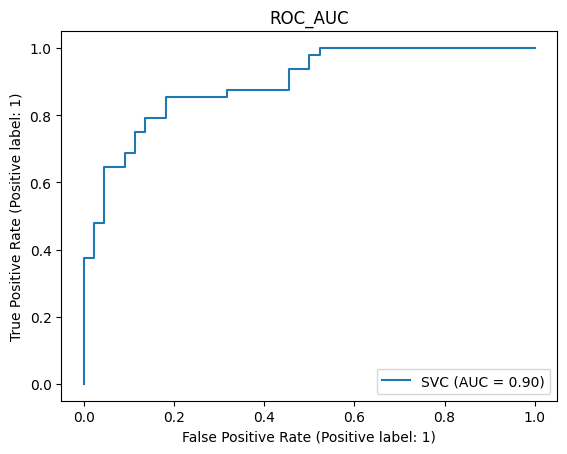

In [17]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test_label,prediction)))
print("Puntuación de validación cruzada (Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_train_label,y_train_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada (Cross Validation Score) con Val: ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_val_label,y_val_label,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test_label,prediction)))

RocCurveDisplay.from_estimator(classifier_svc, X_test_label,y_test_label)

plt.title('ROC_AUC')
plt.show()

Evaluacion del modelo

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.83      0.83      0.83        48

    accuracy                           0.83        92
   macro avg       0.83      0.83      0.83        92
weighted avg       0.83      0.83      0.83        92



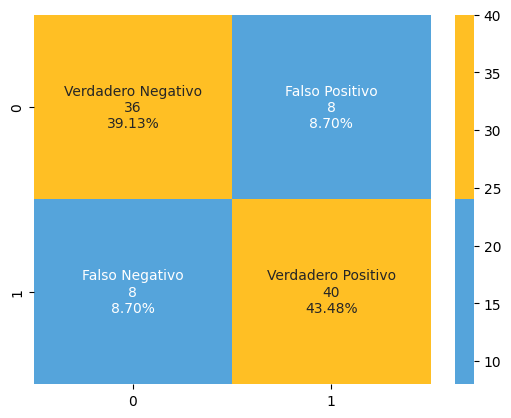

In [18]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test_label,classifier_svc.predict(X_test_label))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test_label,classifier_svc.predict(X_test_label)))

# One Hot Encoder

In [19]:
X = df.drop(['HeartDisease'], axis=1).values
y = df['HeartDisease'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state = RANDOM_STATE)

Aplicamos el one hot encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

X_train_enc = enc.fit_transform(X_train)
X_test_enc = enc.transform(X_test)
X_val_enc = enc.transform(X_val)

**Entrenamiento con diferentes parámetros**

In [22]:
from sklearn.metrics import accuracy_score

Parámetros y valores a comprobar con el modelo de regresión logística

|Param|Values|
|--|--|
|kernel| linear , poly, rbf, sigmoid
|alpha| 0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1	 |






In [23]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cs = [0.00001 ,	0.0001 ,	0.001 ,	0.01 ,	0.1 ,	1]

In [24]:
# Table structure
# penalty max_iterations learning_rate alpha eta
from sklearn.naive_bayes import BernoulliNB

results = []
for kernel in kernels:
  for c in cs:
    print('Entrenando... kernel:{kernel} --- c:{c} ---'.format(kernel=kernel, c = c))
    # Traing model
    classifier_svc = SVC(kernel = kernel, C = c)
    classifier_svc.fit(X_train_label, y_train_label)   # el método fit entrena el modelo con los datos que se le pasan
    # Generate prediction
    prediction = classifier_svc.predict(X_test_label)
    # Calculate accuracy
    accuracy = accuracy_score(y_test_label,prediction)
    print('    ==> Accuracy: {acc} '.format(acc=accuracy))
    print(' ')

    results.append([kernel,c,accuracy]) 

print(results)

Entrenando... kernel:linear --- c:1e-05 ---
    ==> Accuracy: 0.6847826086956522 
 
Entrenando... kernel:linear --- c:0.0001 ---
    ==> Accuracy: 0.7065217391304348 
 
Entrenando... kernel:linear --- c:0.001 ---
    ==> Accuracy: 0.7282608695652174 
 
Entrenando... kernel:linear --- c:0.01 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:linear --- c:0.1 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:linear --- c:1 ---
    ==> Accuracy: 0.8260869565217391 
 
Entrenando... kernel:poly --- c:1e-05 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.0001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.001 ---
    ==> Accuracy: 0.5217391304347826 
 
Entrenando... kernel:poly --- c:0.01 ---
    ==> Accuracy: 0.6195652173913043 
 
Entrenando... kernel:poly --- c:0.1 ---
    ==> Accuracy: 0.6630434782608695 
 
Entrenando... kernel:poly --- c:1 ---
    ==> Accuracy: 0.7065217391304348 
 
Entrenando... ke

In [25]:
results_df = pd.DataFrame(results,columns=['kernel','c','accuracy'])
results_df

,kernel,c,accuracy
0,linear,0.00001,0.684783
1,linear,0.00010,0.706522
2,linear,0.00100,0.728261
3,linear,0.01000,0.826087
4,linear,0.10000,0.826087
5,linear,1.00000,0.826087
6,poly,0.00001,0.521739
7,poly,0.00010,0.521739
8,poly,0.00100,0.521739
9,poly,0.01000,0.619565


**Manejando los resultados de los modelos entrenados**

Establecer un umbral de precisión del 0,75

In [26]:
threshold = 0.75
results_top = results_df[results_df['accuracy'] > threshold].sort_values(by='accuracy',ascending=False)
results_top.head(10)

,kernel,c,accuracy
3,linear,0.01,0.826087
4,linear,0.10,0.826087
5,linear,1.00,0.826087
17,rbf,1.00,0.782609


In [27]:
kernel, c, accuracy = results_top.iloc[0]

params = {'kernel':kernel, 'C':c}

params

{'kernel': 'linear', 'C': 0.01}

Entrenamos el modelo con la mejor combinación de hiperparámetros

In [28]:
classifier_svc = SVC(**params)
classifier_svc.fit(X_train_enc,y_train)
prediction = classifier_svc.predict(X_test_enc)

Evaluacion del modelo

Precisión (Acurracy) :  83.70%
Puntuación de validación cruzada(Cross Validation Score) con Train :  91.84%
Puntuación de validación cruzada(Cross Validation Score) con Val :  96.93%
Puntuación ROC_AUC :  83.62%


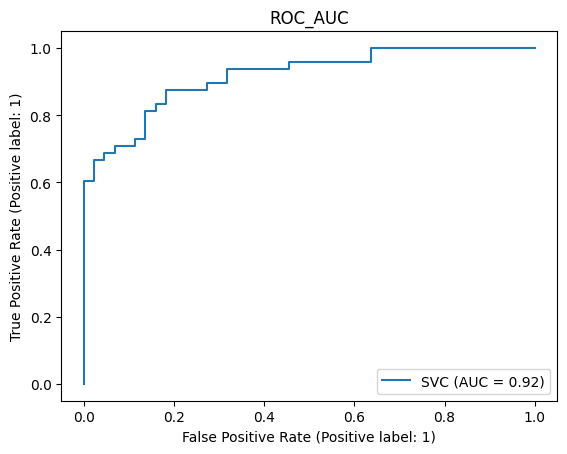

In [29]:
cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)

print("Precisión (Acurracy) : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
print("Puntuación de validación cruzada(Cross Validation Score) con Train : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_train_enc,y_train,cv = cv,scoring = 'roc_auc').mean()))
print("Puntuación de validación cruzada(Cross Validation Score) con Val : ",'{0:.2%}'.format(cross_val_score(classifier_svc,X_val_enc,y_val, cv = cv ,scoring = 'roc_auc').mean()))
print("Puntuación ROC_AUC : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))

RocCurveDisplay.from_estimator(classifier_svc, X_test_enc,y_test)

plt.title('ROC_AUC')
plt.show()

Matriz confusion

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.84      0.85      0.85        48

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.84      0.84      0.84        92



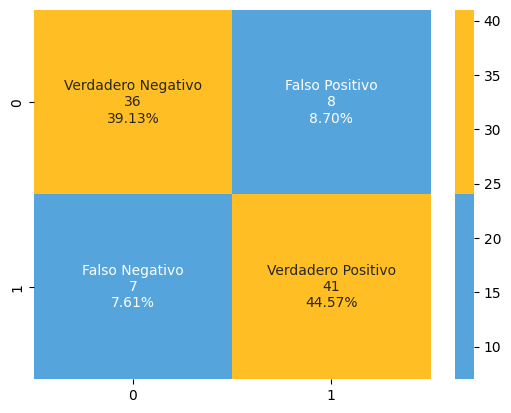

In [30]:
colores = ['#55A4DB','#FFBF24']
# Matriz de confusión

cm = confusion_matrix(y_test,classifier_svc.predict(X_test_enc))
nombres = ['Verdadero Negativo','Falso Positivo','Falso Negativo','Verdadero Positivo']
counts = [value for value in cm.flatten()]
porcentajes = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
etiquetas = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nombres,counts,porcentajes)]
etiquetas = np.asarray(etiquetas).reshape(2,2)
sns.heatmap(cm,annot = etiquetas,cmap = colores,fmt ='')

# Informe con clasificaciones
print(classification_report(y_test,classifier_svc.predict(X_test_enc)))